# Prosper Loan Data
## by Brian Kipkemboi

## Introduction

> - The dataset used in this investigation is a Collection of Loans taken by clients over a period of time. The dataset has 113937 entries and 81 columns.For the purposes of our investigations, I narrowed down to 84,853 entries and 12 columns.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

ImportError: cannot import name 'animation' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\Brian.Kipkemboi\Anaconda3\lib\site-packages\matplotlib\__init__.py)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
dataset = pd.read_csv('prosperLoanData.csv')

In [3]:
print(dataset.shape)
print(dataset.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
dataset.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
print(dataset.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
dataset['LoanKey']

0         E33A3400205839220442E84
1         9E3B37071505919926B1D82
2         6954337960046817851BCB2
3         A0393664465886295619C51
4         A180369302188889200689E
                   ...           
113932    9BD7367919051593140DB62
113933    62D93634569816897D5A276
113934    DD1A370200396006300ACA0
113935    589536350469116027ED11B
113936    00AF3704550953269A64E40
Name: LoanKey, Length: 113937, dtype: object

### What is the structure of your dataset?

> There are 113937 loans in the dataset with 81 features on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income e.t.c.

### What is/are the main feature(s) of interest in your dataset?

> From the dataset I am more interested in finding out loan repayment trends among customers and factors affecting loan default.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since we have 81 columns, we shall select a few that will assist in our exploration, These columns are:'LoanKey', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Investors' 

###### Creating a dataframe from the selected features

In [8]:
selected_features = [ 'LoanKey','Term', 'LoanStatus', 'BorrowerRate', 
                'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'StatedMonthlyIncome', 'TotalProsperLoans', 
                'LoanOriginalAmount', 'LoanOriginationDate', 'Investors']

In [9]:
sample_df = dataset[selected_features]

In [10]:
# checking if the dataframe has been created
#sample_df.sample(5)
sample_df.head()

,LoanKey,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Investors
0,E33A3400205839220442E84,36,Completed,0.1580,NaN,0,Self-employed,3083.333333,NaN,9425,2007-09-12 00:00:00,258
1,9E3B37071505919926B1D82,36,Current,0.0920,A,2,Employed,6125.000000,NaN,10000,2014-03-03 00:00:00,1
2,6954337960046817851BCB2,36,Completed,0.2750,NaN,0,Not available,2083.333333,NaN,3001,2007-01-17 00:00:00,41
3,A0393664465886295619C51,36,Current,0.0974,A,16,Employed,2875.000000,NaN,10000,2012-11-01 00:00:00,158
4,A180369302188889200689E,36,Current,0.2085,D,2,Employed,9583.333333,1.0,15000,2013-09-20 00:00:00,20


In [11]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Investors                  113937 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 10.4+ MB


##### Data Wrangling
> Here we perform simple data wrangling to ensure that we are working with a more refined dataset

Due to High number of missing values in prosper rating, we can drop all the missing value 

In [12]:
sample_df = sample_df.dropna(subset = ['ProsperRating (Alpha)'])

In [13]:
sample_df

,LoanKey,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Investors
1,9E3B37071505919926B1D82,36,Current,0.0920,A,2,Employed,6125.000000,NaN,10000,2014-03-03 00:00:00,1
3,A0393664465886295619C51,36,Current,0.0974,A,16,Employed,2875.000000,NaN,10000,2012-11-01 00:00:00,158
4,A180369302188889200689E,36,Current,0.2085,D,2,Employed,9583.333333,1.0,15000,2013-09-20 00:00:00,20
5,C3D63702273952547E79520,60,Current,0.1314,B,1,Employed,8333.333333,NaN,15000,2013-12-24 00:00:00,1
6,CE963680102927767790520,36,Current,0.2712,E,1,Employed,2083.333333,NaN,3000,2013-04-18 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,9BD7367919051593140DB62,36,Current,0.1864,C,1,Employed,4333.333333,NaN,10000,2013-04-22 00:00:00,1
113933,62D93634569816897D5A276,36,FinalPaymentInProgress,0.1110,A,7,Employed,8041.666667,3.0,2000,2011-11-07 00:00:00,22
113934,DD1A370200396006300ACA0,60,Current,0.2150,D,1,Employed,2875.000000,NaN,10000,2013-12-23 00:00:00,119
113935,589536350469116027ED11B,60,Completed,0.2605,C,2,Full-time,3875.000000,1.0,15000,2011-11-21 00:00:00,274


Checking if null values are dropped correctly

In [14]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanKey                    84853 non-null  object 
 1   Term                       84853 non-null  int64  
 2   LoanStatus                 84853 non-null  object 
 3   BorrowerRate               84853 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null  object 
 5   ListingCategory (numeric)  84853 non-null  int64  
 6   EmploymentStatus           84853 non-null  object 
 7   StatedMonthlyIncome        84853 non-null  float64
 8   TotalProsperLoans          19797 non-null  float64
 9   LoanOriginalAmount         84853 non-null  int64  
 10  LoanOriginationDate        84853 non-null  object 
 11  Investors                  84853 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.4+ MB


Since we still have a lot of null values in total prosper loans column, we fill the null values with 0 instead of dropping the rows.

In [15]:
sample_df['TotalProsperLoans'] = sample_df['TotalProsperLoans'].fillna(0)

In [16]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanKey                    84853 non-null  object 
 1   Term                       84853 non-null  int64  
 2   LoanStatus                 84853 non-null  object 
 3   BorrowerRate               84853 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null  object 
 5   ListingCategory (numeric)  84853 non-null  int64  
 6   EmploymentStatus           84853 non-null  object 
 7   StatedMonthlyIncome        84853 non-null  float64
 8   TotalProsperLoans          84853 non-null  float64
 9   LoanOriginalAmount         84853 non-null  int64  
 10  LoanOriginationDate        84853 non-null  object 
 11  Investors                  84853 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.4+ MB


###### Renaming columnns to more appropriate format

In [17]:
sample_df.rename(index = str, columns={"LoanStatus":"Loan_Status",
                                      "BorrowerRate": "Interest_Rate",
                                      "ProsperRating (Alpha)": "Credit_Grade",
                                      "ListingCategory (numeric)": "Listing",
                                      "EmploymentStatus": "Employment_Status",
                                      "StatedMonthlyIncome": "Monthly_Income",
                                      "TotalProsperLoans": "Total_Loan",
                                      "LoanOriginalAmount":"Sanction_Limit",
                                      "LoanOriginationDate": "Disbursed_Date"}, inplace = True)

In [18]:
sample_df

,LoanKey,Term,Loan_Status,Interest_Rate,Credit_Grade,Listing,Employment_Status,Monthly_Income,Total_Loan,Sanction_Limit,Disbursed_Date,Investors
1,9E3B37071505919926B1D82,36,Current,0.0920,A,2,Employed,6125.000000,0.0,10000,2014-03-03 00:00:00,1
3,A0393664465886295619C51,36,Current,0.0974,A,16,Employed,2875.000000,0.0,10000,2012-11-01 00:00:00,158
4,A180369302188889200689E,36,Current,0.2085,D,2,Employed,9583.333333,1.0,15000,2013-09-20 00:00:00,20
5,C3D63702273952547E79520,60,Current,0.1314,B,1,Employed,8333.333333,0.0,15000,2013-12-24 00:00:00,1
6,CE963680102927767790520,36,Current,0.2712,E,1,Employed,2083.333333,0.0,3000,2013-04-18 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,9BD7367919051593140DB62,36,Current,0.1864,C,1,Employed,4333.333333,0.0,10000,2013-04-22 00:00:00,1
113933,62D93634569816897D5A276,36,FinalPaymentInProgress,0.1110,A,7,Employed,8041.666667,3.0,2000,2011-11-07 00:00:00,22
113934,DD1A370200396006300ACA0,60,Current,0.2150,D,1,Employed,2875.000000,0.0,10000,2013-12-23 00:00:00,119
113935,589536350469116027ED11B,60,Completed,0.2605,C,2,Full-time,3875.000000,1.0,15000,2011-11-21 00:00:00,274


We then convert Disbursed date column to datetime

In [19]:
sample_df['Disbursed_Date'] = pd.to_datetime(sample_df['Disbursed_Date'])

In [20]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LoanKey            84853 non-null  object        
 1   Term               84853 non-null  int64         
 2   Loan_Status        84853 non-null  object        
 3   Interest_Rate      84853 non-null  float64       
 4   Credit_Grade       84853 non-null  object        
 5   Listing            84853 non-null  int64         
 6   Employment_Status  84853 non-null  object        
 7   Monthly_Income     84853 non-null  float64       
 8   Total_Loan         84853 non-null  float64       
 9   Sanction_Limit     84853 non-null  int64         
 10  Disbursed_Date     84853 non-null  datetime64[ns]
 11  Investors          84853 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 8.4+ MB


In [21]:
sample_df.describe()

,Term,Interest_Rate,Listing,Monthly_Income,Total_Loan,Sanction_Limit,Investors
count,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000
mean,42.486135,0.196022,3.312647,5.931175e+03,0.340789,9083.440515,68.264669
std,11.640346,0.074631,4.364277,8.239944e+03,0.726235,6287.860058,95.195831
min,12.000000,0.040000,0.000000,0.000000e+00,0.000000,1000.000000,1.000000
25%,36.000000,0.135900,1.000000,3.434000e+03,0.000000,4000.000000,1.000000
50%,36.000000,0.187500,1.000000,5.000000e+03,0.000000,7500.000000,32.000000
75%,60.000000,0.257400,3.000000,7.083333e+03,0.000000,13500.000000,97.000000
max,60.000000,0.360000,20.000000,1.750003e+06,8.000000,35000.000000,1189.000000


## Univariate Exploration

#### I will start looking at the distribution of the Loan Original Amount now the Sanction LImit

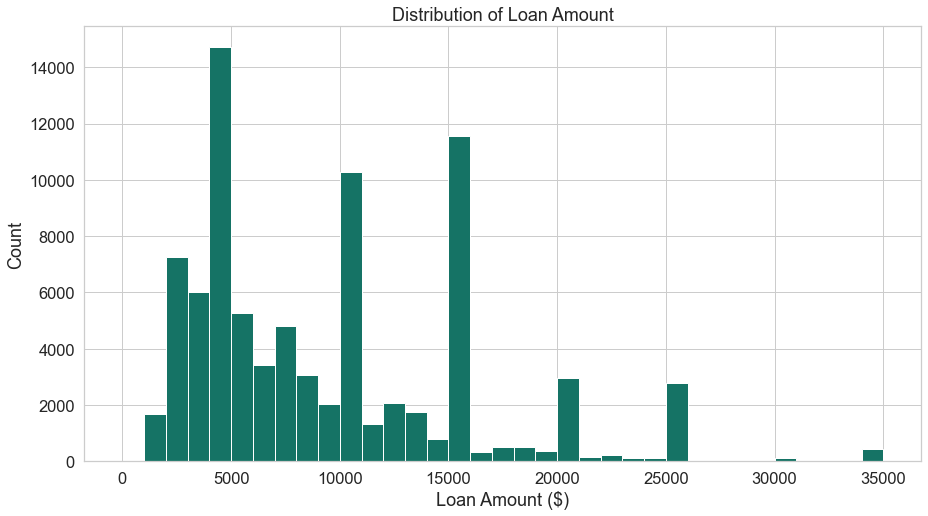

In [22]:
binsize = 1000 
bins = np.arange(0, sample_df['Sanction_Limit'].max()+binsize, binsize)
sns.set(style="whitegrid", font_scale = 1.5)
plt.figure(figsize=[15,8])
plt.hist(data = sample_df, x = 'Sanction_Limit',bins = bins, color = "#157365")
plt.xlabel('Loan Amount ($)')
plt.ylabel("Count")
plt.title('Distribution of Loan Amount')
plt.savefig('Loan_dist.png', dpi=300, bbox_inches='tight')
plt.show();

> ###### Findings
> - There are longtails from the dataset with amounts around USD 5000, 10000 and 15000

In [23]:
def log_tran(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [24]:
log_tran(sample_df['Sanction_Limit'].describe())

count    4.928667
mean     3.958250
std      3.798503
min      3.000000
25%      3.602060
50%      3.875061
75%      4.130334
max      4.544068
Name: Sanction_Limit, dtype: float64

##### Using Log_scaled sanction limit distribution

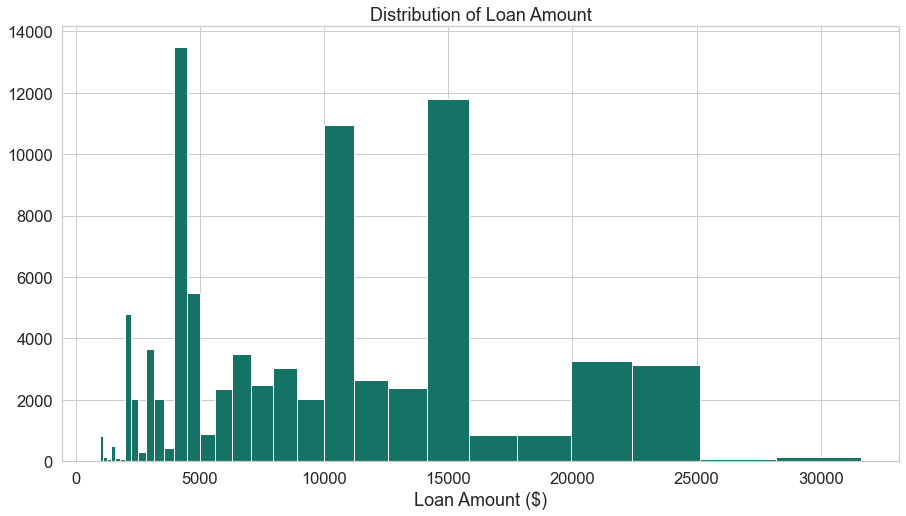

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize = [15,8])
bins = 10 ** np.arange(3, 4.5 + 0.05, 0.05)
plt.hist(data = sample_df, x = 'Sanction_Limit',bins = bins, color = "#157365")
sns.set(style="whitegrid", font_scale = 1.5)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.show();
plt.savefig('Loan_dist_2.png', dpi=300, bbox_inches='tight');

> ###### Findings
> - Despite using log transformation, there are still longgtails from the dataset with amounts around USD 5000, 10000 and 15000

#### Looking at the loan status groupings

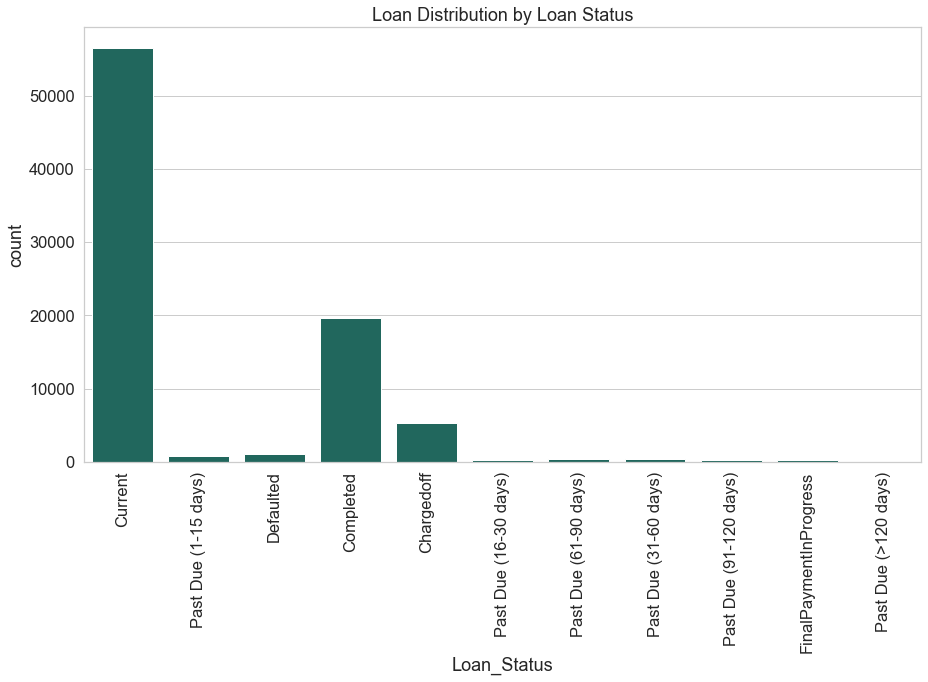

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.set(style="whitegrid", font_scale = 1.5)
sns.countplot(data = sample_df, x = 'Loan_Status', color = "#157365")
plt.title("Loan Distribution by Loan Status")
plt.show();
plt.savefig('Status_dist.png', dpi=300, bbox_inches='tight');

> ###### Findings
> - Majority of loans in the dataset thats are yet to be paid are current loans.
> - Loans that are past due are categorized depending on due days ranges.

#### Checking The Employment Status

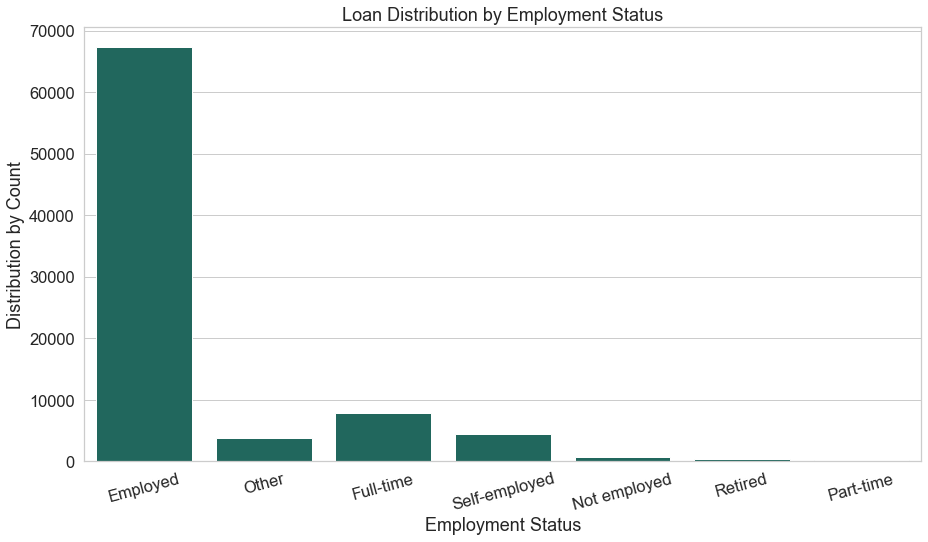

<Figure size 432x288 with 0 Axes>

In [27]:
sns.set(style="whitegrid", font_scale = 1.5)
plt.figure(figsize=(15,8))
plt.xticks(rotation = 15)
sns.countplot(data = sample_df, x = "Employment_Status", color = "#157365")
plt.title("Loan Distribution by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Distribution by Count")
plt.show()
plt.savefig('Employment_dist.png', dpi=300, bbox_inches='tight')


> ###### Findings
> - Most borrowers are employed.

#### Checking Distribution of Loans By Term

In [28]:
term_grouped = sample_df.groupby(['Term'])['LoanKey'].agg('count')
terms = term_grouped.reset_index()
terms

,Term,LoanKey
0,12,1613
1,36,58695
2,60,24545


In [29]:
terms['Term_1'] = np.where((terms['Term'] == 12), '12 Months', 
                          np.where((terms['Term'] == 36), '36 Months', 
                           np.where((terms['Term'] == 60), '60 Months', "nO change")))

In [30]:
terms

,Term,LoanKey,Term_1
0,12,1613,12 Months
1,36,58695,36 Months
2,60,24545,60 Months


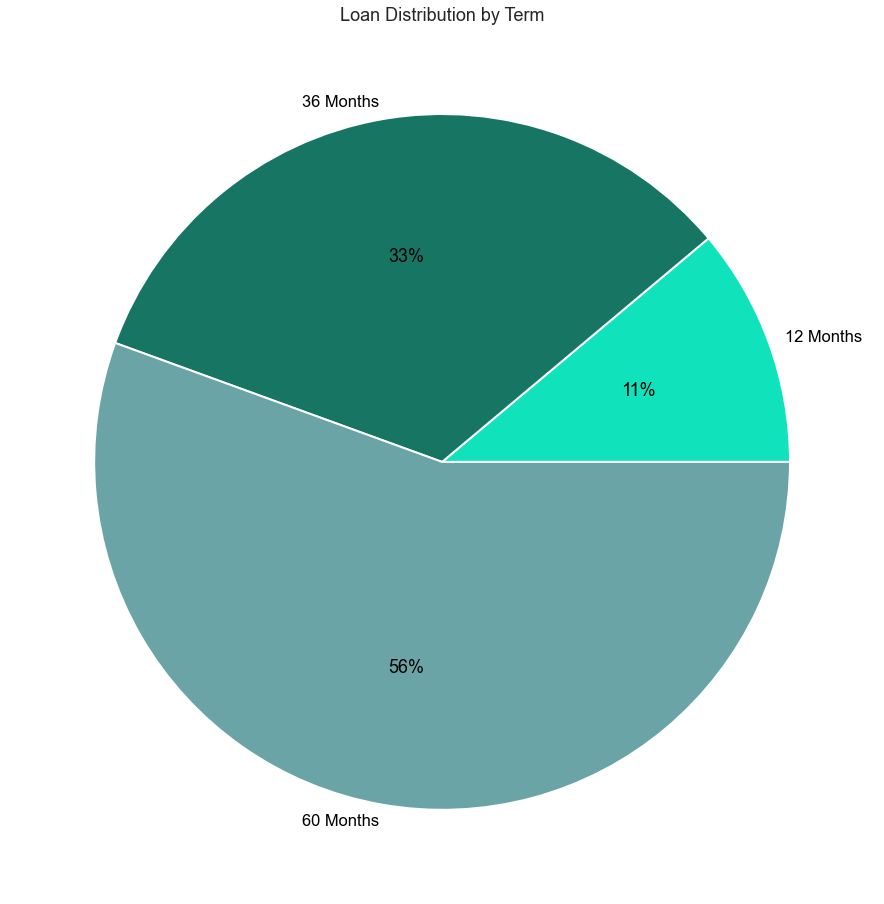

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(16,16))
colors = ['#10e3bc', '#177564', '#6aa4a6']
plt.pie(data = terms, labeldistance=1.05, x  = 'Term', labels = 'Term_1', colors = colors, autopct='%.0f%%', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
        textprops={'color':"black"})
sns.set(font_scale = 1.5)
plt.title("Loan Distribution by Term")
plt.show()
plt.savefig('Loan Term.png', dpi=300, bbox_inches='tight')

> ###### Findings
> - From above presentation, 56 % of the loans taken are for a period of 60 Months while 33 % and 11 % of the loans were taken for a period of 36 and 12 Months respectively

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Variables taken into consideration indicated that there were long tails when it comes to loan amount taken. When it comes to loan Term, the variables had to be grouped in order to have a clear indication of how loans are distributed among available loan terms.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I performed tidiness on the Loan Term since one cannot easily depict how long is the term.

## Bivariate Exploration

In [32]:
numeric_vars = ['Term','Interest_Rate','Listing','Monthly_Income','Total_Loan','Investors']
categoric_vars = ['Credit_Grade', 'Loan_Status', 'Employment_Status']

#### Correlation plot

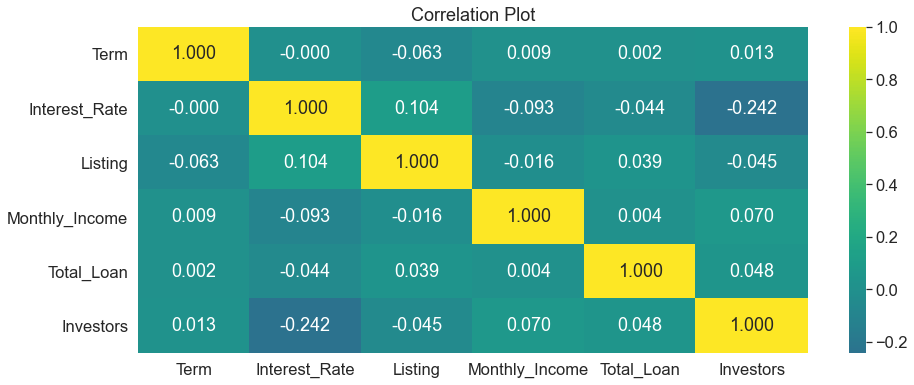

<Figure size 432x288 with 0 Axes>

In [33]:

plt.figure(figsize = [15,6])
sns.heatmap(sample_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.title("Correlation Plot")
plt.show()
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')

In [34]:
# plot matrix: Taking a sample of 1000 loans to have a clear observation
dataset_sample = sample_df.sample(n=1000, replace = False)

#### Pair Plot Matrix

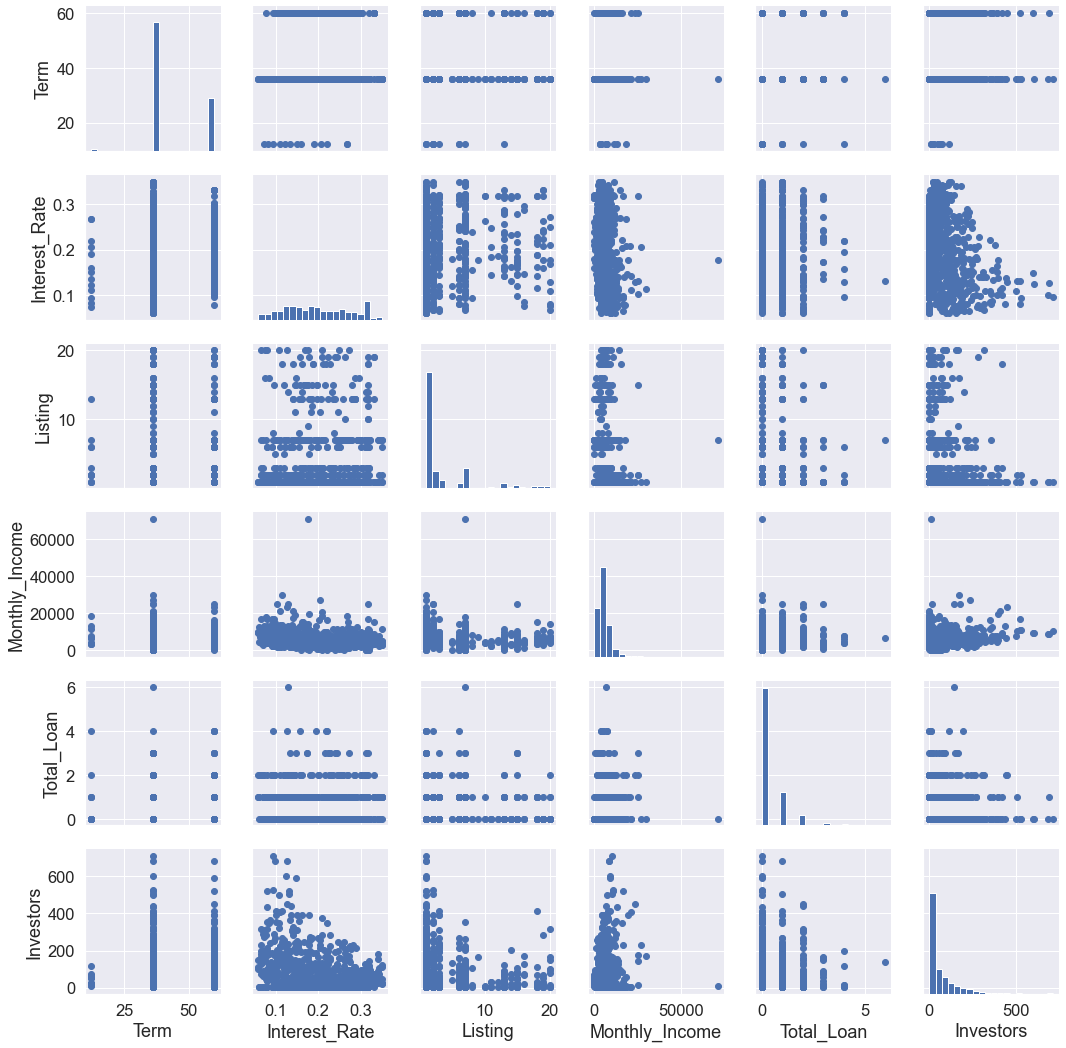

In [35]:
g = sns.PairGrid(data = dataset_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);


##### Finding how loans are distributed in terms of complete payments or defaulted. 

creating groupings of completed and defaulted loans

In [36]:
groups = (sample_df['Loan_Status'] == 'Completed') | (sample_df['Loan_Status'] == 'Defaulted') | (sample_df['Loan_Status'] == 'Chargedoff')

In [37]:
sample_df_1 = sample_df[groups]

In [38]:
# Creating a function to handle the transformation
def default_transform(row):
    if row['Loan_Status'] == "Chargedoff":
        return "Defaulted"
    else:
        return row['Loan_Status']
    
sample_df_1['Loan_Status'] = sample_df_1.apply(default_transform, axis=1)
sample_df_1['Loan_Status'].unique()
sample_df_1['Loan_Status'].value_counts()

<ipython-input-38-ccf5d8eee0dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_1['Loan_Status'] = sample_df_1.apply(default_transform, axis=1)


Completed    19664
Defaulted     6341
Name: Loan_Status, dtype: int64

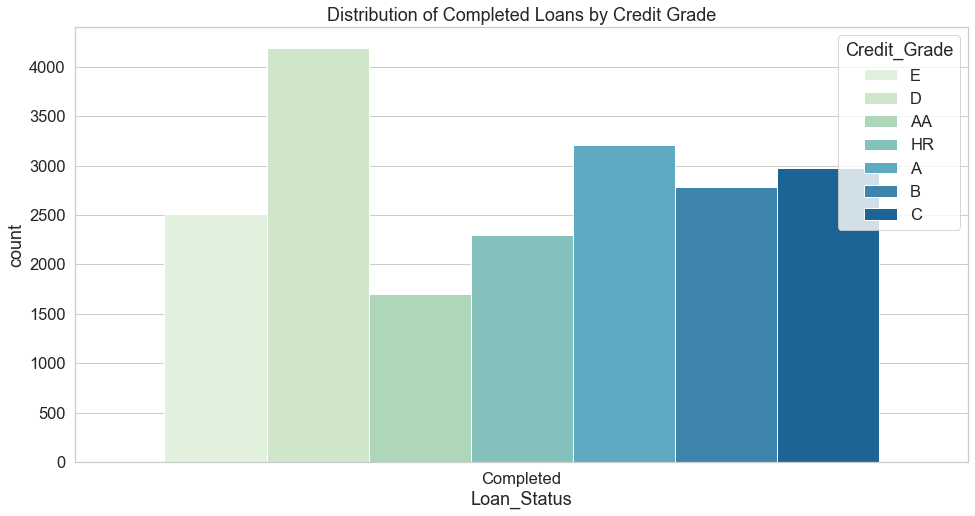

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize = [16,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.countplot(data = sample_df_1[sample_df_1['Loan_Status'] == 'Completed'].sort_values(by = 'Loan_Status', ascending = False), x ='Loan_Status', hue = 'Credit_Grade',
              palette = "GnBu");
plt.title('Distribution of Completed Loans by Credit Grade')
plt.show();
plt.savefig('Completed.png', dpi=300, bbox_inches='tight')


> ###### Findings
> - For completed loans, credit grade "D" had the highest frequencies among the credit grades.

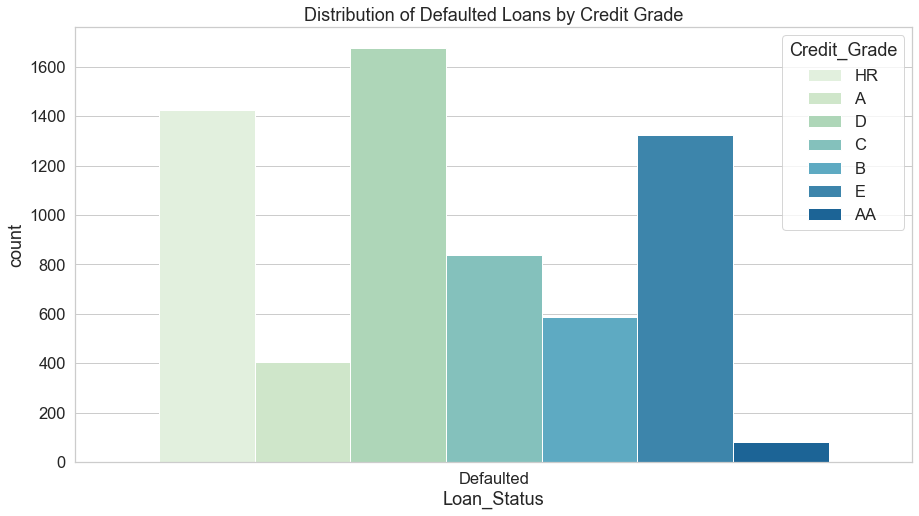

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize = [15,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.countplot(data = sample_df_1[sample_df_1['Loan_Status'] == 'Defaulted'].sort_values(by = 'Loan_Status', ascending = False), x ='Loan_Status', hue = 'Credit_Grade',
              palette = "GnBu");
plt.title('Distribution of Defaulted Loans by Credit Grade')
plt.show();
plt.savefig('Defaulted.png', dpi=300, bbox_inches='tight')


> ###### Findings
> - Same as completed loans, credit grade "D" had the highest frequencies among the credit grades for defaulted loans.

#### Checking relationship between Loan status and loan Amount

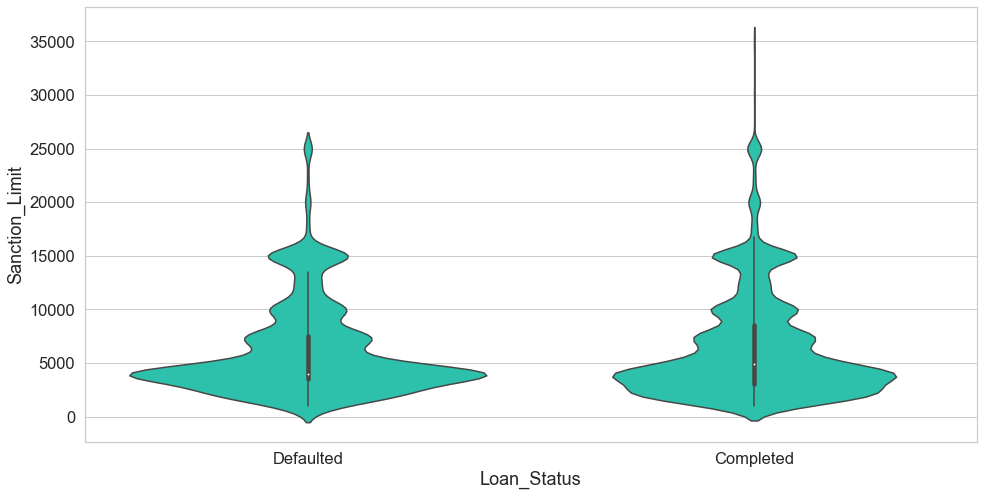

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize = [16,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.violinplot(data = sample_df_1, x = 'Loan_Status', y = "Sanction_Limit", color = '#14d9bb')
plt.show();
plt.savefig('loan status vs Amount.png', dpi=300, bbox_inches='tight')

> ###### Findings
> - Completed loans had an outlier well above USD 35000

#### Checking Loan status vs Investors

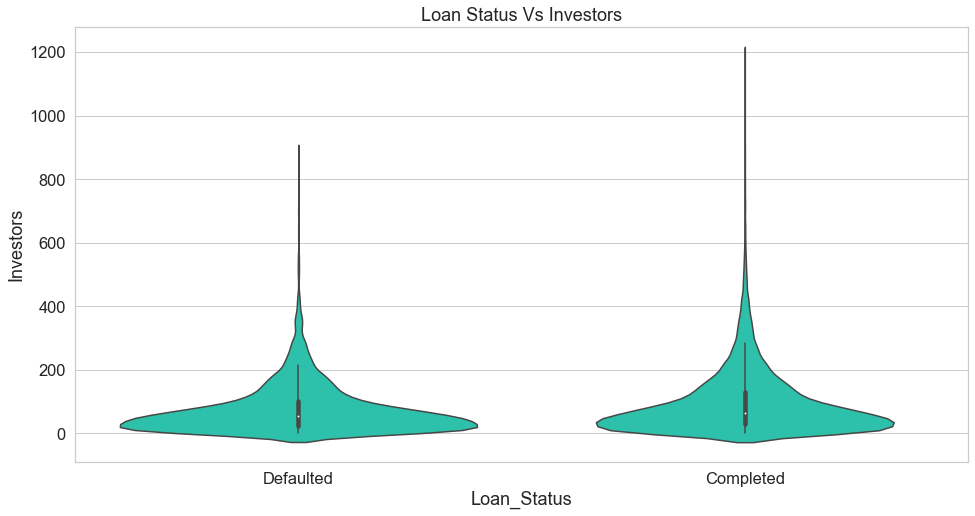

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize = [16,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.violinplot(data = sample_df_1, x = 'Loan_Status', y = "Investors", color = '#14d9bb')
plt.title("Loan Status Vs Investors")
plt.show();
plt.savefig('loan status vs Investors.png', dpi=300, bbox_inches='tight')

> ###### Findings
> - Defaulted loans have a large base compared to completed loans

#### Checking Term vs Loan Amount

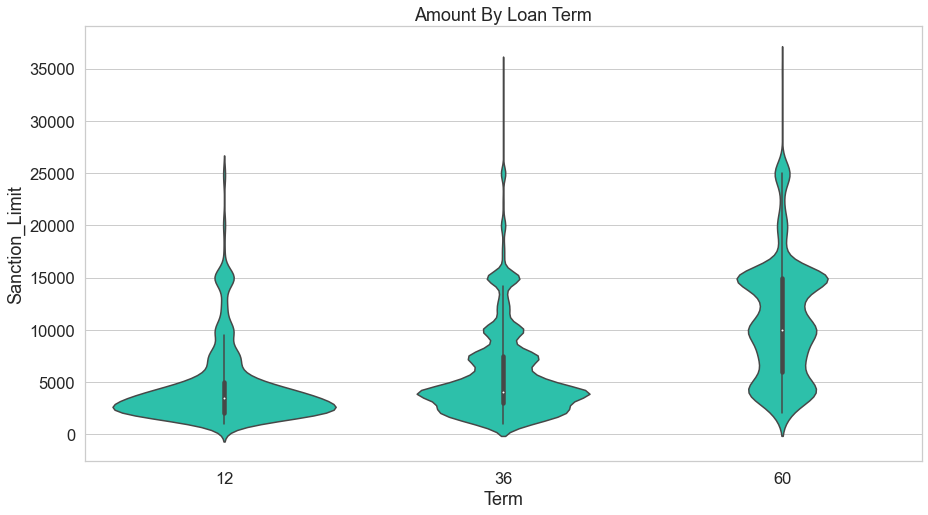

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize = [15,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.violinplot(data = sample_df_1, x = 'Term', y = "Sanction_Limit", color = '#14d9bb')
plt.title("Amount By Loan Term")
plt.show();
plt.savefig('loan Term vs Amount.png', dpi=300, bbox_inches='tight')

> ###### Findings
> - Loans with 60 Months Tenure have a mean amount of USD 10000

#### Checking credit_Grade and term of the loan

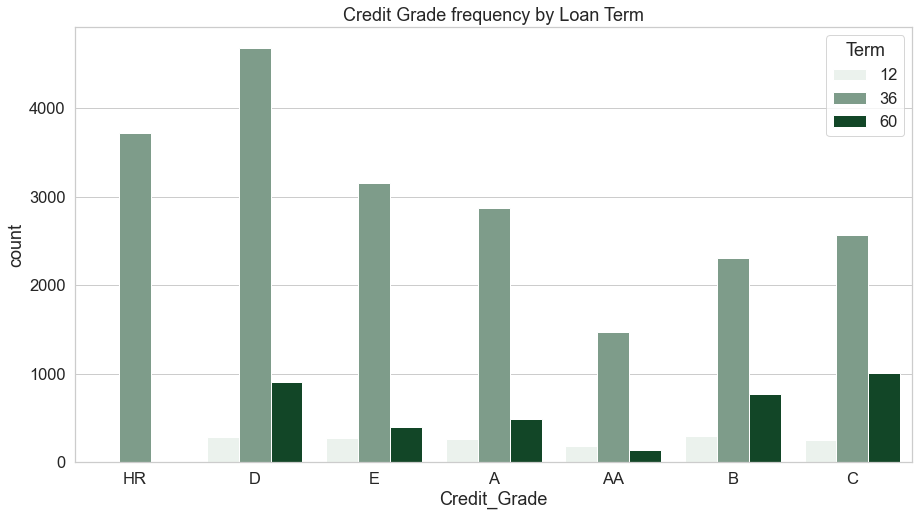

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize = [15,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.countplot(data = sample_df_1, x = 'Credit_Grade', hue = 'Term', color = '#094f26');
plt.title("Credit Grade frequency by Loan Term")
plt.show();
plt.savefig('Credit Grade frequency vs Term.png', dpi=300, bbox_inches='tight');

#### Checking Employment Status and Term of the Loan

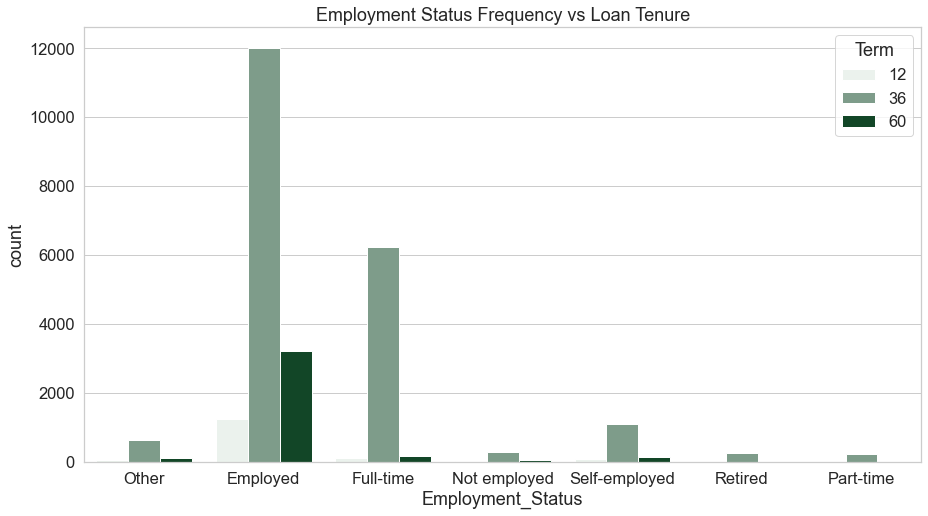

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize = [15,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.countplot(data = sample_df_1, x = 'Employment_Status', hue = 'Term', color = '#094f26')
plt.title('Employment Status Frequency vs Loan Tenure')
plt.show();
plt.savefig('Employment Status frequency vs Term.png', dpi=300, bbox_inches='tight');

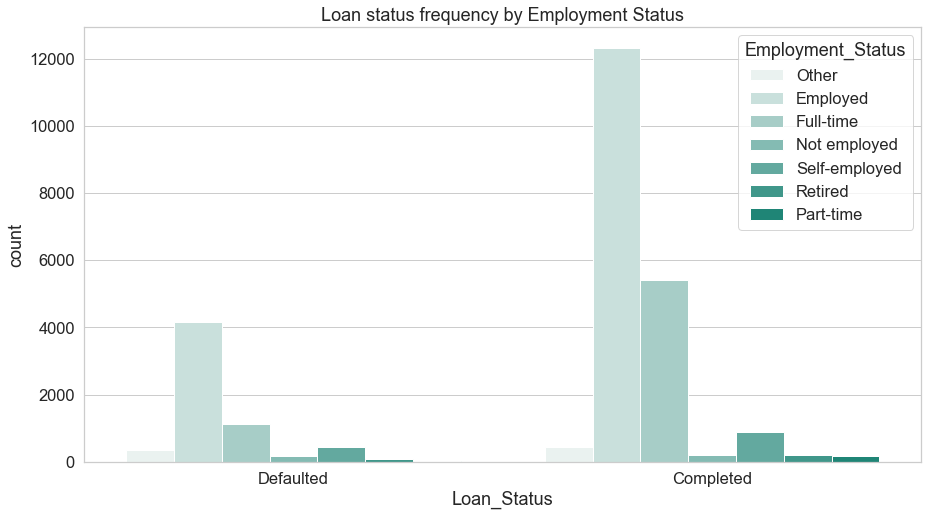

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize = [15,8])
sns.set(style="whitegrid", font_scale = 1.5)
sns.countplot(data = sample_df_1, x = 'Loan_Status', hue = 'Employment_Status', color = '#0e9682')
plt.title("Loan status frequency by Employment Status")
plt.show()
plt.savefig('Loan status frequency by Employment Status.png', dpi=300, bbox_inches='tight');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> -  Correlation and Pair plots represents how variables relates to one another determine whether there are psotive or negative correlations.
> - Loans distribution by status and credit grade: for completed loans, most loans fell in category "D" while category "AA" had the least count of loans
while for defaulted loans, most loans fell in category "D" while category "HR" had the least count of loans
> - Loan status vs Loan Amount: From the plots, defaulted loans had a large base of amount below USD 5000 compared to completed loans.
> - Loan Status vs Investors: Most completed loans had high number of investors compared to defaulted loans.
> - Loan Amount Vs Tenure: For loans with 60 Months Tenure had mean amount at USD 10000, while for 12 and 36 Months had averages below USD 5000

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Credit Grade and Loan Tenure: Among the credit grade categories, most loans were taken for 36 months repayment period.
> - Employment Status and Loan Tenure: Among employment status categories, most loans were taken for 36 months repayment period.

## Multivariate Exploration

#### Checking Relationship between Sanction limit, Employment Status and Loan Status  

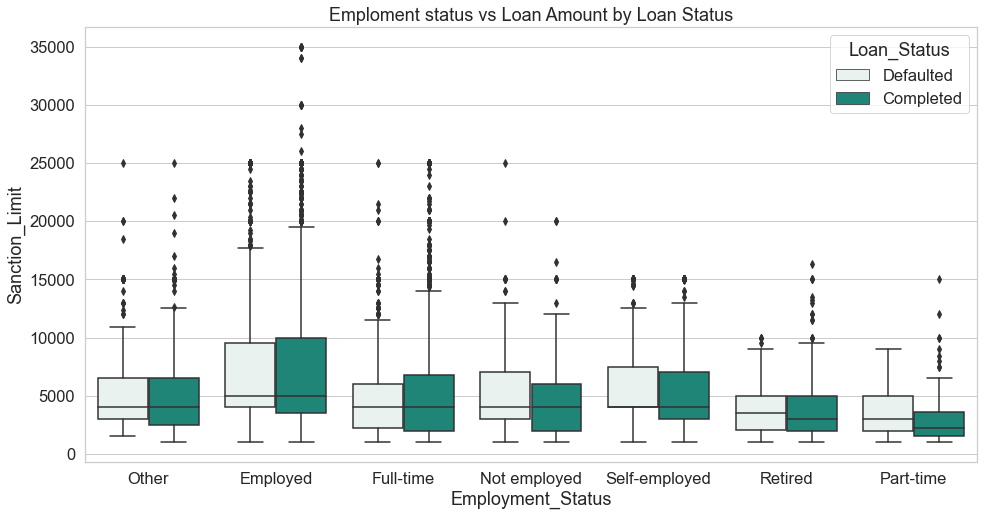

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize = (16,8))
sns.set(style="whitegrid", font_scale = 1.5)
sns.boxplot(data = sample_df_1, x = 'Employment_Status', y = "Sanction_Limit", hue = "Loan_Status", color = "#0e9682")
plt.title("Emploment status vs Loan Amount by Loan Status")
plt.show()
plt.savefig('Emploment status vs Loan Amount by Loan Status', dpi=300, bbox_inches='tight');

#### checking Relationship between Sanction Limit, Loan_Status and Term of Loan

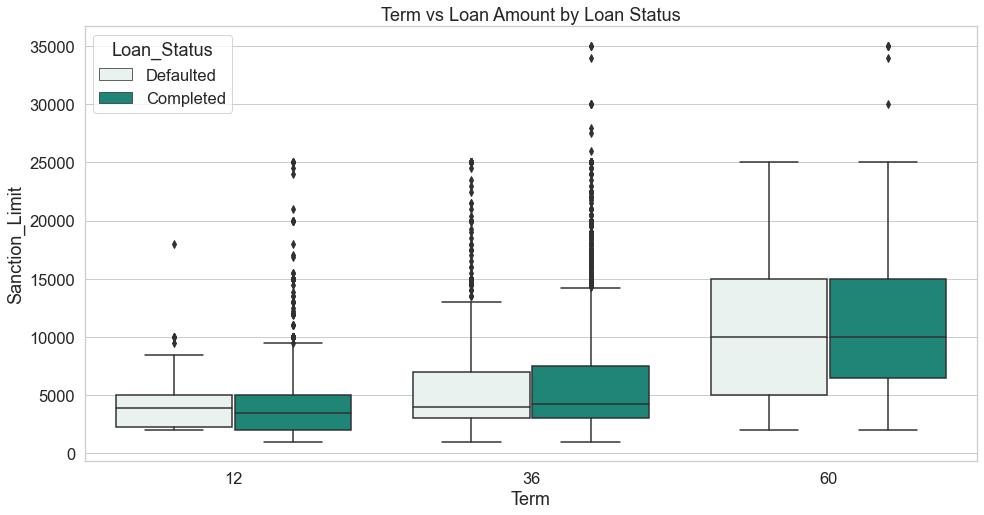

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize = (16,8))
sns.set(style="whitegrid", font_scale = 1.5)
sns.boxplot(data = sample_df_1, x = 'Term', y = "Sanction_Limit", hue = "Loan_Status", color = "#0e9682")
plt.title("Term vs Loan Amount by Loan Status")
plt.show()
plt.savefig('Term vs Loan Amount by Loan Status', dpi=300, bbox_inches='tight');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For loan amounts with tenure 60 Months, mean value for both defaulted and completed loans are at USD 10000.

### Were there any interesting or surprising interactions between features?

> For 12 Months terms, defaulted mean loan amount is quite higher than that of completed loans.

## Conclusions
> Our initial dataset had 113,937 loan samples and 81 features which was narrowed down to sample of interest of 84,853 samples and 12 features that was used to support our investigations. 
From our investigations, it was determined that more than 65000 of the clients with loans were employed and 56 % of the total loan amount was taken under 60 Months tenure period.


In [49]:
!jupyter nbconvert Part_I_exploration_template.ipynb --no-input --no-prompt --to slides --stdout > index.html

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to slides
